# Customer Behaviour Insight Engine - Notebook 6a
## CBS Digital Adoption (Device Usage) - Data Exploration 

**Goal of 6a**
This notebook connects the syntehtic e-commerce dataset to  **real Dutch statistics** from CBS (Central Burea voor Statistiek).

Speficially this notebook will: 

- Load a CBS CSV about *ICT-gebruik van personen* (internet & device usage).
- Handle **EU-formatted CSV** (semicolon separator, comma decimals).
- Keep **all original Dutch column names** to align with the source material
- Explore the table and column values 
- Identify which columns are relevant for **device / mobile usage**, which will later be compared with the synthetic site's device mix. 
- Prepare a clear overview for a cleaned, analysis-ready version in Notebook 6b. 

In [24]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", "{:.2f}".format)

## 1. CBS dataset: source and file format

The dataset comes from: 

- **CBS Open Data** -> ICT-gebruik van personen
- It contains yearly statistics (2012 - 2019) for: 
    - Internet usage frequency
    - Place of use (home, work, school, elsewhere)
    - **Mobile usage by device type**
    - Some internet activities (e-mail, cloud, government websites, etc.)

The raw CSV is: 

- Saved locally asL `../data/exernal/cbs_digital_adoption.csv`
- Delimited with **semicolon (`;`)**
- Uses **coma (`,`) as decimal separator**, e.g. `88,3` instead of `88.3`

Python / pandas expect: 

- Commas as separators by default
- Dots as decimal points 

I need to **explicitly tell pandas** how to read this EU-style CSV.

In [14]:
# 1. Load CBS digital adoption data (raw, Dutch column names)

import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

cbs_path = "../data/external/cbs_digital_adoption.csv"

cbs = pd.read_csv(
    cbs_path,
    sep=";",          # <-- semicolon separated
    decimal=",",      # <-- convert 88,3 -> 88.3
    encoding="utf-8", # try utf-8 first
)

cbs.head()

,Kenmerken personen,Marges,Perioden,Internet gebruik/wanneer internet het laatst gebruikt/Minder dan 3 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/3 tot 12 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/Meer dan 12 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/Nooit internet gebruikt (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/(Bijna) elke dag (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minstens een keer per week (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minder dan een keer per week (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Thuis (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Bij iemand anders thuis (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Op het werk (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Bij een onderwijsinstelling (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Ergens anders (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart phone (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur (% van personen 12 jaar of ouder),Internet activiteiten/Communicatie/Versturen/ontvangen e-mails (% van personen 12 jaar of ouder),Internet activiteiten/Informatie en vermaak/Gebruik van diensten in de reisbranche (% van personen 12 jaar of ouder),Internet activiteiten/Informatie en vermaak/Zoeken van baan of solliciteren (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Onderwijs/Volgen van online cursus (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Zoeken op websites (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Officiële documenten downloaden (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Ingevulde documenten versturen (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Zoeken op websites (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Officiële documenten downloaden (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Ingevulde documenten versturen (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Cloud computing (% van personen 12 jaar of ouder),"Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Tekst, spreadsheets, presentaties (% van personen 12 jaar of ouder)",Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Foto's (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/E-Books of e-magazins (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Muziek (% van perso

In [16]:
# 2. Basic structure

print("Shape:", cbs.shape)
print("\nFirst rows:")
display(cbs.head())

print("\nColumns:")
for col in cbs.columns:
    print(col)

Shape: (8, 38)

First rows:


,Kenmerken personen,Marges,Perioden,Internet gebruik/wanneer internet het laatst gebruikt/Minder dan 3 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/3 tot 12 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/Meer dan 12 maanden geleden (% van personen 12 jaar of ouder),Internet gebruik/wanneer internet het laatst gebruikt/Nooit internet gebruikt (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/(Bijna) elke dag (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minstens een keer per week (% van personen 12 jaar of ouder),Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minder dan een keer per week (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Thuis (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Bij iemand anders thuis (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Op het werk (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Bij een onderwijsinstelling (% van personen 12 jaar of ouder),Internet gebruik/Plaats gebruik afgelopen 3 maanden/Ergens anders (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart phone (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur (% van personen 12 jaar of ouder),Internet activiteiten/Communicatie/Versturen/ontvangen e-mails (% van personen 12 jaar of ouder),Internet activiteiten/Informatie en vermaak/Gebruik van diensten in de reisbranche (% van personen 12 jaar of ouder),Internet activiteiten/Informatie en vermaak/Zoeken van baan of solliciteren (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Onderwijs/Volgen van online cursus (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Zoeken op websites (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Officiële documenten downloaden (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites overheid/Ingevulde documenten versturen (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Zoeken op websites (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Officiële documenten downloaden (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Overheids- en publieke instanties/Gebruik websites publieke instanties/Ingevulde documenten versturen (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Cloud computing (% van personen 12 jaar of ouder),"Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Tekst, spreadsheets, presentaties (% van personen 12 jaar of ouder)",Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Foto's (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/E-Books of e-magazins (% van personen 12 jaar of ouder),Internet activiteiten/Dienstverlening/Gebruik internet als opslagmedium/Soort van opgeslagen bestanden/Muziek (% van perso


Columns:
Kenmerken personen
Marges
Perioden
Internet gebruik/wanneer internet het laatst gebruikt/Minder dan 3 maanden geleden (% van personen 12 jaar of ouder)
Internet gebruik/wanneer internet het laatst gebruikt/3 tot 12 maanden geleden (% van personen 12 jaar of ouder)
Internet gebruik/wanneer internet het laatst gebruikt/Meer dan 12 maanden geleden (% van personen 12 jaar of ouder)
Internet gebruik/wanneer internet het laatst gebruikt/Nooit internet gebruikt (% van personen 12 jaar of ouder)
Internet gebruik/Frequentie gebruik afgelopen 3 maanden/(Bijna) elke dag (% van personen 12 jaar of ouder)
Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minstens een keer per week (% van personen 12 jaar of ouder)
Internet gebruik/Frequentie gebruik afgelopen 3 maanden/Minder dan een keer per week (% van personen 12 jaar of ouder)
Internet gebruik/Plaats gebruik afgelopen 3 maanden/Thuis (% van personen 12 jaar of ouder)
Internet gebruik/Plaats gebruik afgelopen 3 maanden/Bij iemand

## 2. First look at the structure 

- **Rows:** Each row is a combination of:
    -`Kenmerken personen` (person characteristics, here: `Totall personen`)
    - `Marges` (Here: `Waarde` - the actual measured value)
    - `Perioden` (year: 2012 - 2019)

- **Columns:** Ther remaining columns are percentages (% van personen 12 jaar of ouder) for different aspects of internet usage, such as: 
    - when people last used internet
    - How frequently they use it
    - Where they use it (home, work, school, etc.)
    - **Mobile useage per device type** (will be used later)
    - Some internet activities (e-mail, governement websites, cloud, etc.)

In Notbebook 6a, column names will be kept **exactly as CBSs provides them** and focus on **understanding** which ones are relevent for device usage comparison. 


In [17]:
# 3. Dimension columns: what categories are present? 

print("Unique `Kenmerken personen':")
print(cbs["Kenmerken personen"].unique())

print("\nUnique `Marges`:")
print(cbs["Marges"].unique())

print("\nUnique `Perioden`:")
print(cbs["Perioden"].unique())

Unique `Kenmerken personen':
['Totaal personen']

Unique `Marges`:
['Waarde']

Unique `Perioden`:
[2012 2013 2014 2015 2016 2017 2018 2019]


### 2.1 Dimension columns 

- `Kenmerken personen`: here it is only **`Totaal personen`**, meaning this table is already aggregated over the entire population (12+).
- `Marges`: the value type - here it is `Waarde` for the actual percentages.
- `Perioden`: they **year** (2012-2019).

For integration with the Kaggle dataset, the interest is mainly in: 

- The **time dimension** (`Perioden' - year), 
- The **device / mobile usage columns** to compare with my site's device mix (desktop / mobile / tablet).

My dataset can be anchored roughly around 2018-2019, therefore those years will be the most releveant reference points later. 

In [18]:
# 4. Focus on mobile / device usage columns 

device_cols = [
    col for col in cbs.columns
    if "Mobiel gebruik afgelopen 3 maanden" in col
]

device_cols

['Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal (% van personen 12 jaar of ouder)',
 'Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart phone (% van personen 12 jaar of ouder)',
 'Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop (% van personen 12 jaar of ouder)',
 'Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet (% van personen 12 jaar of ouder)',
 'Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur (% van personen 12 jaar of ouder)']

In [20]:
# 5. View only the key columns for mobile / device usage 

cbs_devices = cbs[["Perioden"] + device_cols].copy()
cbs_devices

,Perioden,Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart phone (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur (% van personen 12 jaar of ouder)
0,2012,51.4,40.3,29.2,16.1,NaN
1,2013,60.7,53.6,24.3,19.9,1.6
2,2014,65.9,60.4,23.7,23.3,4.9
3,2015,71.1,66.6,24.8,25.2,5.1
4,2016,73.2,70.5,22.0,21.9,4.5
5,2017,82.4,79.2,38.7,35.8,13.1
6,2018,81.7,79.4,32.5,26.7,9.1
7,2019,84.4,82.5,35.0,27.5,10.9


## 3. Understanding the device / mobile usage columns 

The selected columns are: 

- **`Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal`**
    -> Share of people (12+) who used the internet on **any mobile device** in the last 3 months. 

- **`Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart pohne`**
    -> Share of people (12+) who used internet on a **mobile phone or smartphone**. 

- **`Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop`**  
  → Share of people (12+) who used internet on a **laptop** as a mobile device.

- **`Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet`**  
  → Share of people (12+) who used internet on a **tablet**.

- **`Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur`**  
  → Share of people (12+) who used internet on **other mobile equipment**.

All values are **percentages** of the Dutch population aged 12+.

These columns allow comparrison of:

- How often Ducht people use **smartphoone, laptops, tablets** for internet, 
- With the **device mis from the Kaggle set** (`desktop`, `mobile`, `tablet`) from earlier notebook in this engine. 

In [25]:
# 6. Quick summary states for device usage over time

cbs_devices.describe(include="all")

,Perioden,Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Totaal (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Mobiele telefoon of smart phone (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Laptop (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Tablet (% van personen 12 jaar of ouder),Internet gebruik/Mobiel gebruik afgelopen 3 maanden/Andere mobiele apparatuur (% van personen 12 jaar of ouder)
count,8.00,8.00,8.00,8.00,8.00,7.00
mean,2015.50,71.35,66.56,28.77,24.55,7.03
std,2.45,11.61,14.59,6.08,5.88,4.09
min,2012.00,51.40,40.30,22.00,16.10,1.60
25%,2013.75,64.60,58.70,24.15,21.40,4.70
50%,2015.50,72.15,68.55,27.00,24.25,5.10
75%,2017.25,81.88,79.25,33.12,26.90,10.00
max,2019.00,84.40,82.50,38.70,35.80,13.10


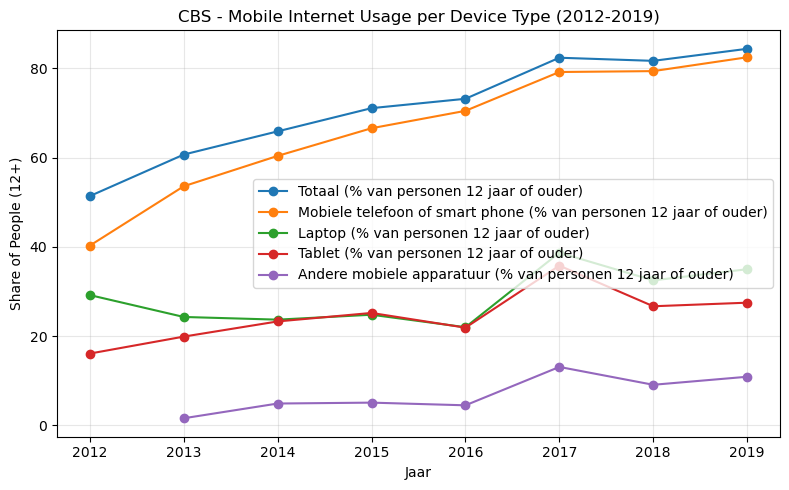

In [26]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 5))

for col in device_cols:
    plt.plot(cbs["Perioden"], cbs[col], marker="o", label=col.split("/")[-1])

plt.title("CBS - Mobile Internet Usage per Device Type (2012-2019)")
plt.xlabel("Jaar")
plt.ylabel("Share of People (12+)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Summary of Notebook 6a

In this notebook I:

- Loaded a **Dutch CBS dataset** (`ICT-gebruik van personen`) from `../data/external/cbs_digital_adoption.csv`.
- Handled **EU CSV conventions**:
  - Semicolon (`;`) as separator
  - Comma (`,`) as decimal separator
- Kept **all Dutch column names** exactly as provided by CBS.
- Identified the main dimensions:
  - `Kenmerken personen` (here: `Totaal personen`)
  - `Marges` (here: `Waarde`)
  - `Perioden` (years 2012–2019)
- Selected and examined the **mobile / device usage columns**, which show:
  - Overall mobile internet usage
  - Breakdown by smartphone, laptop, tablet, and other mobile devices

These fields will be used in **Notebook 6b** to:

- Create a tidy, analysis-ready table with:
  - `year`
  - `device_category` (e.g. smartphone, laptop, tablet)
  - `share_pct`
- Align the CBS device categories with my **site device mix** (`desktop`, `mobile`, `tablet`)
- Allow direct comparisons between **my site’s traffic/device data** and **Dutch national patterns**.

This demonstrates that my Customer Behaviour Insight Engine can:
- Integrate **external, official statistics**,
- Work with **Dutch, EU-formatted data**, and
- Enrich behavioural insights with **real-world context**.